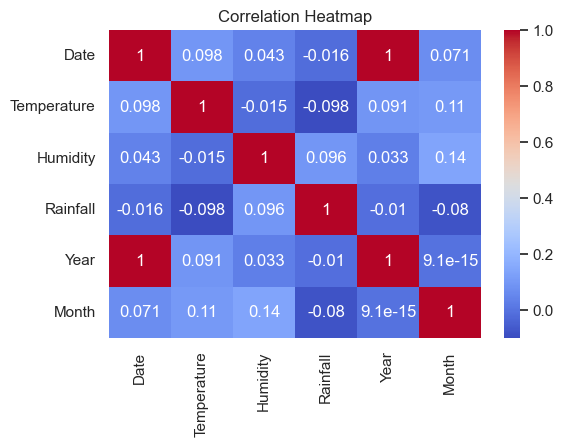

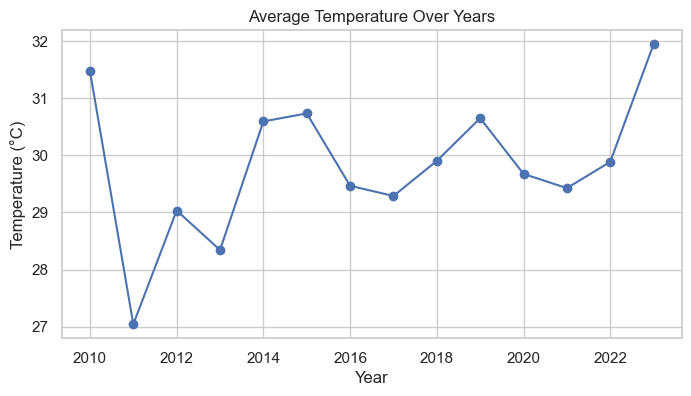

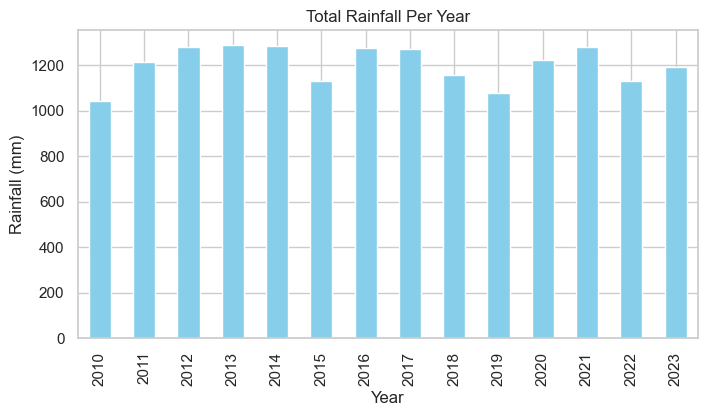

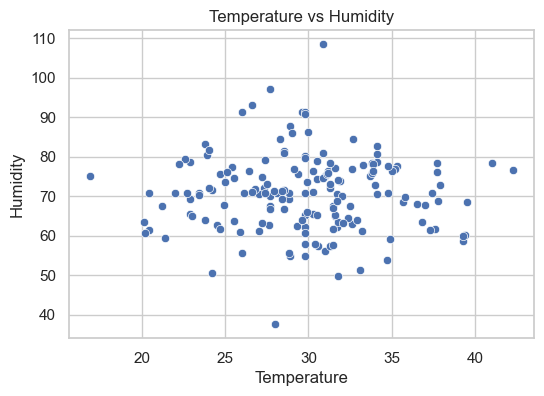

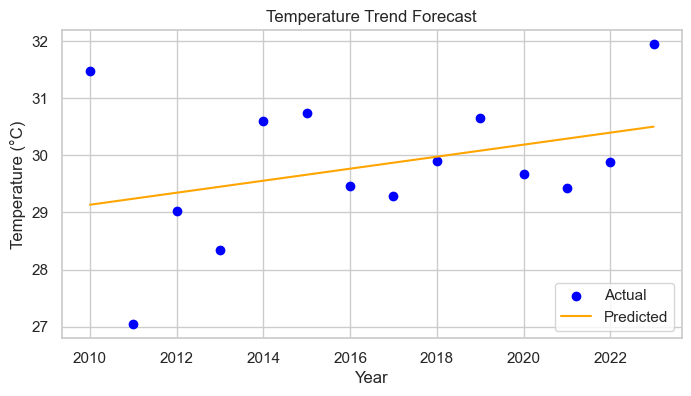

MSE: 1.28
RMSE: 1.13


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Optional: Configure plots
sns.set(style='whitegrid')
# Load dataset
df = pd.read_csv("sample_weather_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Display first few rows
df.head()
# Fill missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Descriptive statistics
df.describe()
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
temp_trend = df.groupby('Year')['Temperature'].mean()
plt.figure(figsize=(8, 4))
plt.plot(temp_trend.index, temp_trend.values, marker='o')
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()
rainfall_sum = df.groupby('Year')['Rainfall'].sum()
rainfall_sum.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title("Total Rainfall Per Year")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Year")
plt.show()
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature', y='Humidity', data=df)
plt.title("Temperature vs Humidity")
plt.show()
X = df.groupby('Year').mean().index.values.reshape(-1, 1)
y = df.groupby('Year')['Temperature'].mean().values

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Plot predictions
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predictions, color='orange', label='Predicted')
plt.title("Temperature Trend Forecast")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Evaluate
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
